# Preprocessing, EDA, feature engineering

data source: https://www.kaggle.com/datasets/anikannal/solar-power-generation-data/data

### About the data

- data gathered at two solar power plants in India over period of 34 days
- two pairs of files: each pair with power generation data and sensor reading dataset
- power generation data gathered at the inverter level at 15 min. intervals - each inverter has multiple lines of solar panels attached to it
- sensor data is gathered at plant level - single array of sensors optimally placed at plant

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
import sagemaker
import boto3
from dotenv import load_dotenv
import os

In [ ]:
load_dotenv()

sagemaker_session = sagemaker.Session()
region = sagemaker_session.boto_region_name

# AWS-Konfiguration aus Umgebungsvariablen
s3 = boto3.client("s3")
bucket = "jp-ppp-project"

p1gen_file_path = "data/Plant_1_Generation_Data.csv"
p2gen_file_path = "data/Plant_2_Generation_Data.csv"
p1weather_file_path = "data/Plant_1_Weather_Sensor_Data.csv"
p2weather_file_path = "data/Plant_2_Weather_Sensor_Data.csv"

local_folder = "/data/p1gen.csv"

s3.download_file(bucket, p1gen_file_path, p1gen_file_path)

[01/23/25 14:51:22] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=993447;file:///home/vscode/.local/lib/python3.12/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=543778;file:///home/vscode/.local/lib/python3.12/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

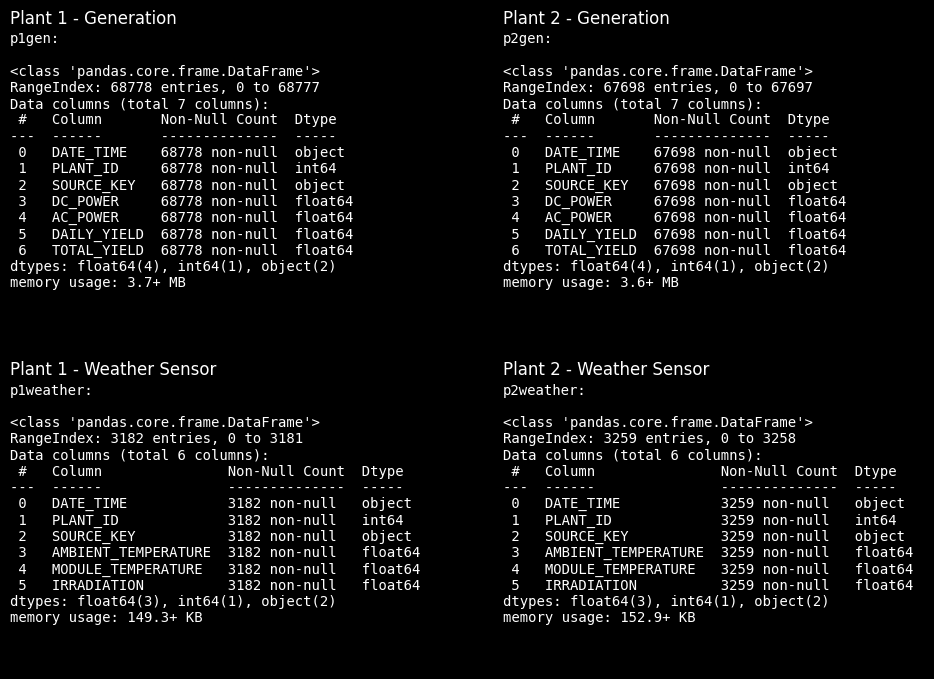

In [3]:
def get_info_text(df):
    buffer = StringIO()
    df.info(buf=buffer)
    return buffer.getvalue()

dfs = [("p1gen", p1gen), ("p2gen", p2gen), ("p1weather", p1weather), ("p2weather", p2weather)]

fig, axes = plt.subplots(2, 2, figsize=(10, 7))
fig.patch.set_facecolor("black")
axes = axes.flatten()
columns = ["Plant 1", "Plant 2"]
rows = ["Generation", "Weather Sensor"]

for i, (name, df) in enumerate(dfs):
    ax = axes[i]
    ax.set_facecolor("black") 
    ax.axis("off")  
    info_text = get_info_text(df) 
    ax.text(
        0, 1, f"{name}:\n\n{info_text}",
        fontsize=10,
        va="top",
        ha="left",
        family="monospace",
        color="white" 
    )
    row, col = divmod(i, 2)
    ax.set_title(f"{columns[col]} - {rows[row]}", fontsize=12, color="white", loc="left")
fig.tight_layout(pad=1.0)
plt.show()

keine "Null"-Werte, aber 0-Werte

In [4]:
p1gen.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [5]:
p2gen.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


In [6]:
print(f"p1gen # Quellen: {p1gen['SOURCE_KEY'].nunique()}")
print(f"p2gen # Quellen: {p2gen['SOURCE_KEY'].nunique()}")

p1gen # Quellen: 22
p2gen # Quellen: 22
